# MASH results on V6 data
Without $X^TX$ in prior and instead of setting $\hat{V} = cor(Z_{null})$ we set $\hat{V} = I$.

Input data is generated by procedures [documented here](20171002_MASH_V8.html).

In [ ]:
!sos run analysis/20171002_MASH_V8.ipynb sfa \
    --data ~/Documents/GTEx/mash_revision/GTExV6.Z.rds
!sos run analysis/20171002_MASH_V8.ipynb mash \
    --data ~/Documents/GTEx/mash_revision/GTExV6.Z.rds \
    --cov noxx --vhat 0

In [1]:
library(lattice)
library(ggplot2)
library(colorRamps)
library(mashr)
library(repr)

Loading required package: ashr


In [6]:
res = readRDS('~/Documents/GTEx/mash_revision/GTExV6.Z.noxx.K5.P3.V0.mash_model.rds')
res$result = readRDS('~/Documents/GTEx/mash_revision/GTExV6.Z.noxx.K5.P3.V0.mash_posterior.rds')

## MASH model fit
The log-likelihood of fit is:

In [7]:
get_loglik(res)

[1] -3067921

vs. in V6 mash paper the loglik was -1268999

Here is a plot of weights learned.

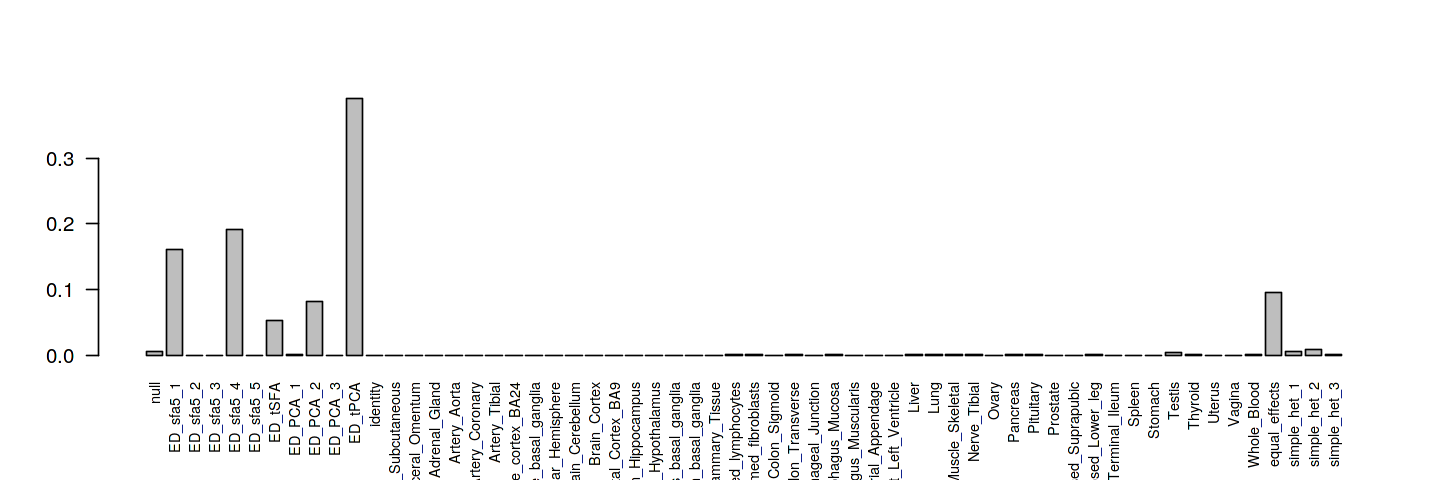

In [8]:
options(repr.plot.width=12, repr.plot.height=4)
barplot(get_estimated_pi(res), las = 2, cex.names = 0.7)

The rank 3 PCA component accounts for ~40% of all weights in the GTEx data. But unlike in [mash paper analysis](https://stephenslab.github.io/gtexresults_mash/Fig.Uk3.html) **I do not see very hight weights on singleton matrices**. Here is a visualization for it (via correlation heatmap):

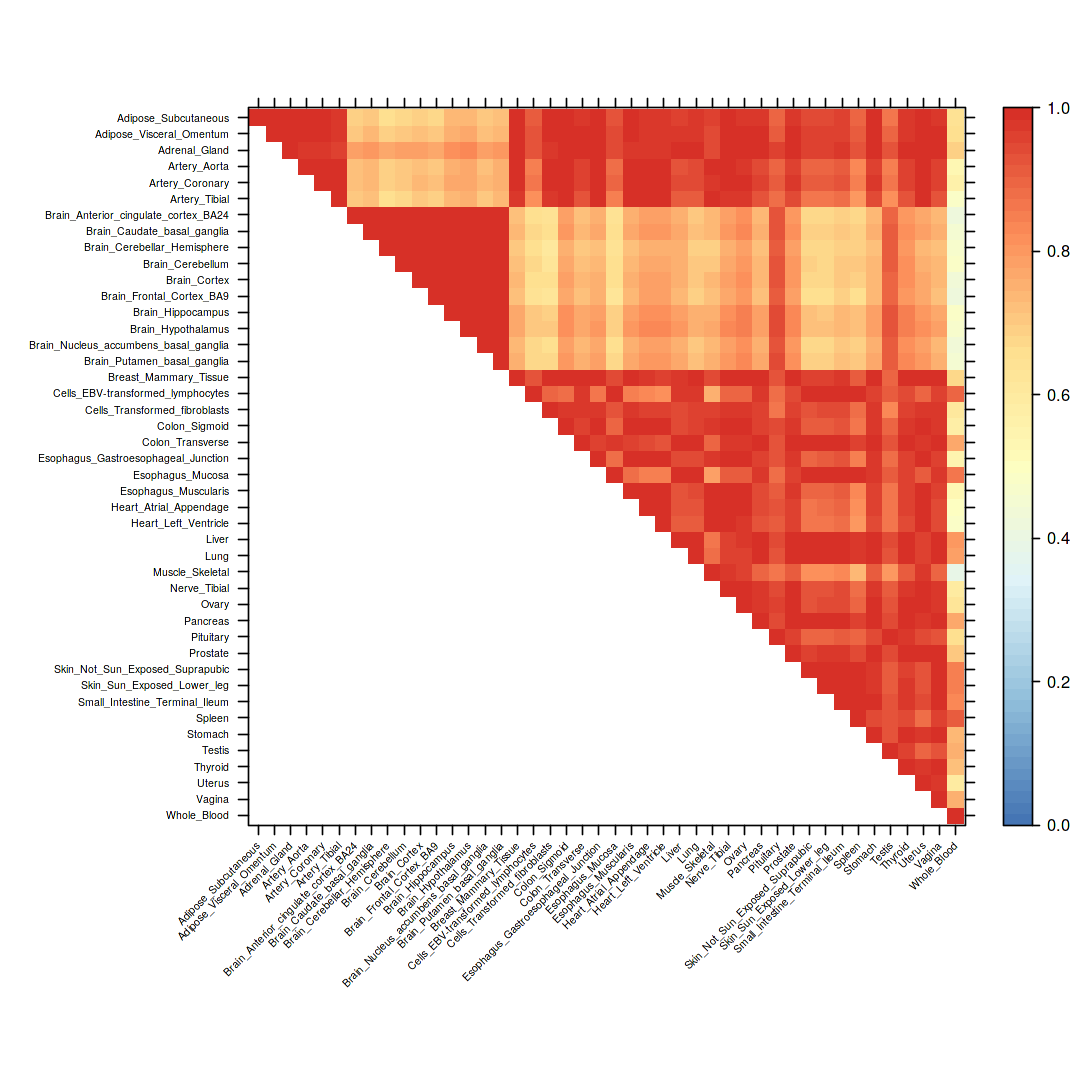

In [9]:
x           <- cov2cor(res$fitted_g$Ulist[["ED_tPCA"]])
x[x < 0]    <- 0
colnames(x) <- colnames(get_lfsr(res))
rownames(x) <- colnames(x)
x <- x[rev(rownames(x)),rev(colnames(x))]
x[lower.tri(x)] <- NA
clrs <- colorRampPalette(rev(c("#D73027","#FC8D59","#FEE090","#FFFFBF",
                               "#E0F3F8","#91BFDB","#4575B4")))(64)
n <- nrow(x)
options(repr.plot.width=9, repr.plot.height=9)
print(levelplot(x[n:1,],col.regions = clrs,xlab = "",ylab = "",
                colorkey = TRUE, at = seq(0,1,length.out = 64),
                scales = list(cex = 0.5,x = list(rot = 45))))

Again this is different from in [mash paper analysis](https://stephenslab.github.io/gtexresults_mash/Fig.Uk3.html).

Next we perform SVD on the rank 3 PCA based covariance matrix, and plot the top eigen vectors.

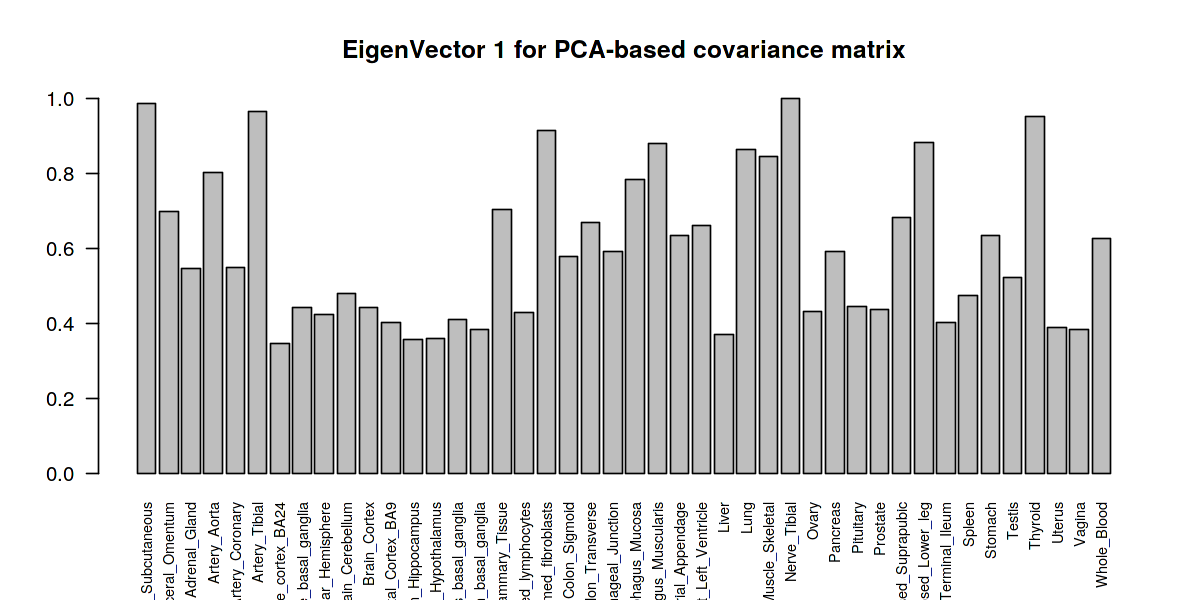

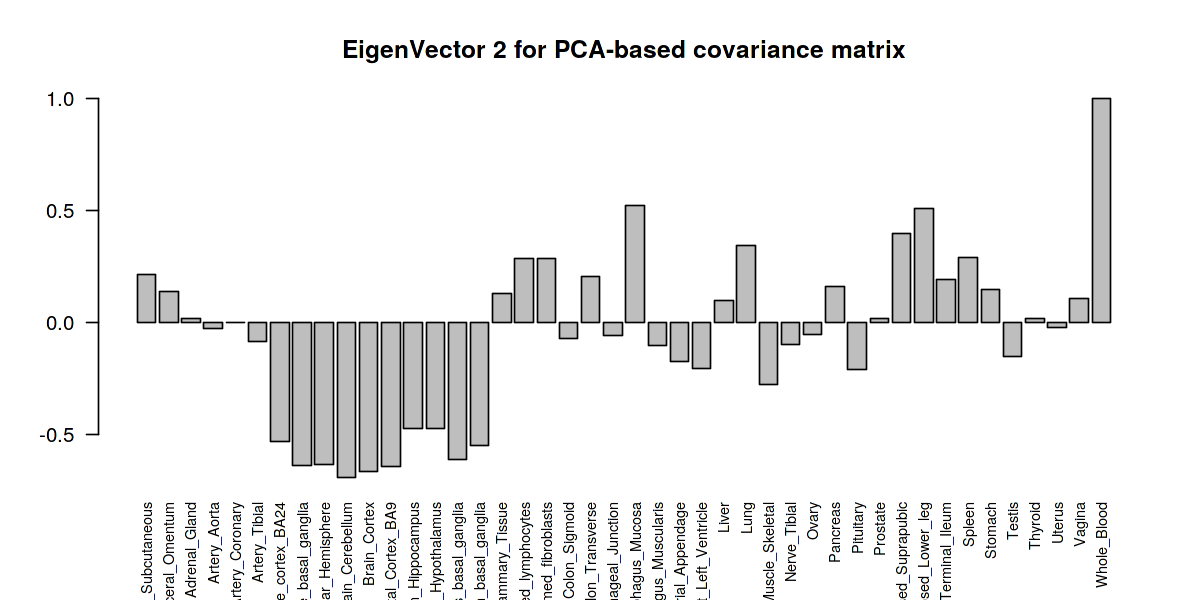

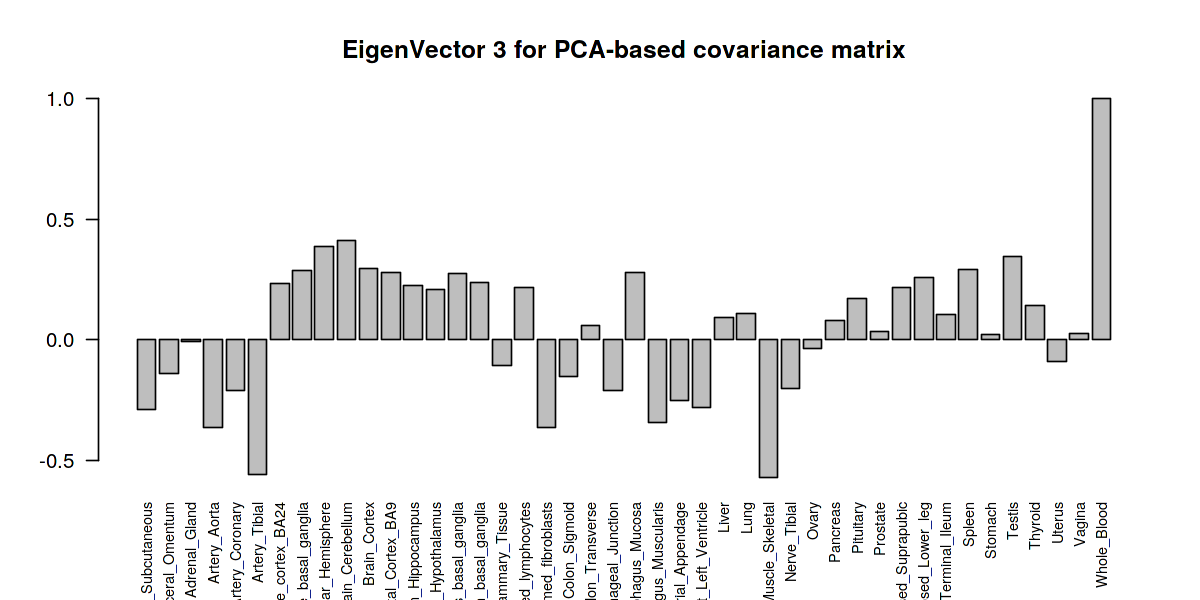

In [10]:
svd.out = svd(res$fitted_g$Ulist[["ED_tPCA"]])
v = svd.out$v
colnames(v) = colnames(get_lfsr(res))
rownames(v) = colnames(v)
options(repr.plot.width=10, repr.plot.height=5)
for (j in 1:3)
  barplot(v[,j]/v[,j][which.max(abs(v[,j]))], cex.names = 0.7,
          las = 2, main = paste0("EigenVector ", j, " for PCA-based covariance matrix"))

Still, [mash paper analysis](https://stephenslab.github.io/gtexresults_mash/Fig.Uk3.html) cannot be reproduced.